# **Algortihms**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

def epsilon_greedy_policy(state, Q, n_actions, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    else:
        return np.argmax(Q[state])

In [ ]:
def q_learning(env, gamma=0.9, alpha=0.1, epsilon=0.1, episodes=1000, eval_interval=50):
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    Q = np.zeros((n_states, n_actions))

    rewards_per_episode = []
    eval_rewards = []

    for ep in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            action = epsilon_greedy_policy(state, Q, n_actions, epsilon)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            best_next_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state][best_next_action]
            td_error = td_target - Q[state][action]
            Q[state][action] += alpha * td_error

            state = next_state
            total_reward += reward

        rewards_per_episode.append(total_reward)

        if ep % eval_interval == 0:
            eval_rewards.append(evaluate_policy(env, Q, episodes=50))

    return Q, rewards_per_episode, eval_rewards

In [ ]:
def sarsa(env, gamma=0.9, alpha=0.1, epsilon=0.1, episodes=1000, eval_interval=50):
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    Q = np.zeros((n_states, n_actions))

    rewards_per_episode = []
    eval_rewards = []

    for ep in range(episodes):
        state, _ = env.reset()
        action = epsilon_greedy_policy(state, Q, n_actions, epsilon)
        done = False
        total_reward = 0

        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_action = epsilon_greedy_policy(next_state, Q, n_actions, epsilon)

            td_target = reward + gamma * Q[next_state][next_action]
            td_error = td_target - Q[state][action]
            Q[state][action] += alpha * td_error

            state = next_state
            action = next_action
            total_reward += reward

        rewards_per_episode.append(total_reward)

        if ep % eval_interval == 0:
            eval_rewards.append(evaluate_policy(env, Q, episodes=50))

    return Q, rewards_per_episode, eval_rewards

In [ ]:
def evaluate_policy(env, Q, episodes=50):
    total_rewards = []
    for _ in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            action = np.argmax(Q[state])
            state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward

        total_rewards.append(total_reward)

    return np.mean(total_rewards)

# **Compare algorithms on same plot**

In [ ]:
def plot_rewards(q_rewards, sarsa_rewards, label_q='Q-Learning', label_s='SARSA'):
    plt.figure(figsize=(10, 6))
    plt.plot(q_rewards, label=label_q)
    plt.plot(sarsa_rewards, label=label_s)
    plt.xlabel("Eval Interval (every X episodes)")
    plt.ylabel("Average reward")
    plt.title("Policy Evaluation during Training")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

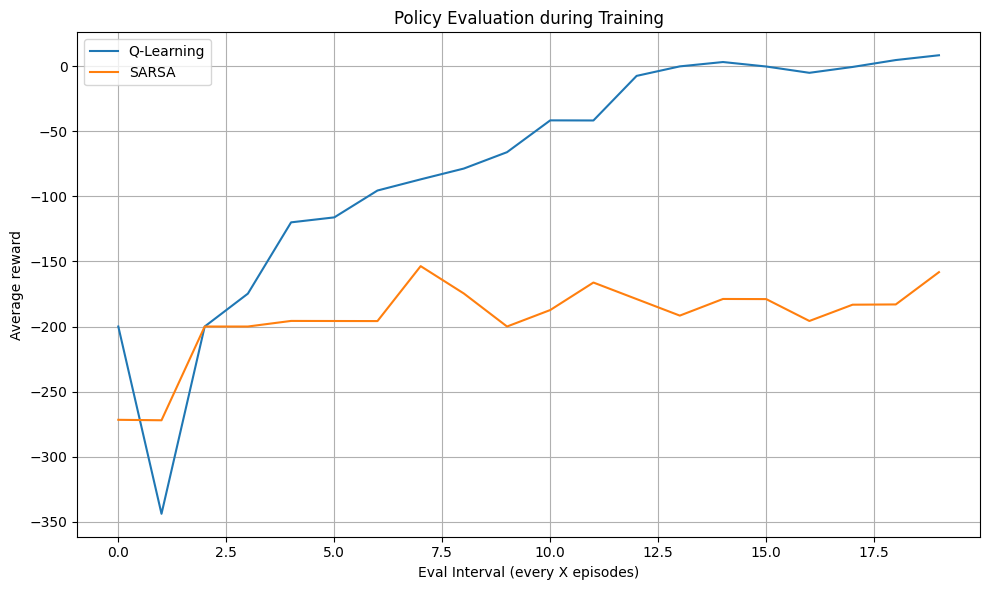

In [ ]:
env_taxi = gym.make("Taxi-v3")

Q_q, q_rewards, q_eval = q_learning(env_taxi, gamma=0.9, alpha=0.5, epsilon=0.5)
Q_s, sarsa_rewards, s_eval = sarsa(env_taxi, gamma=0.9, alpha=0.5, epsilon=0.5)

plot_rewards(q_eval, s_eval)


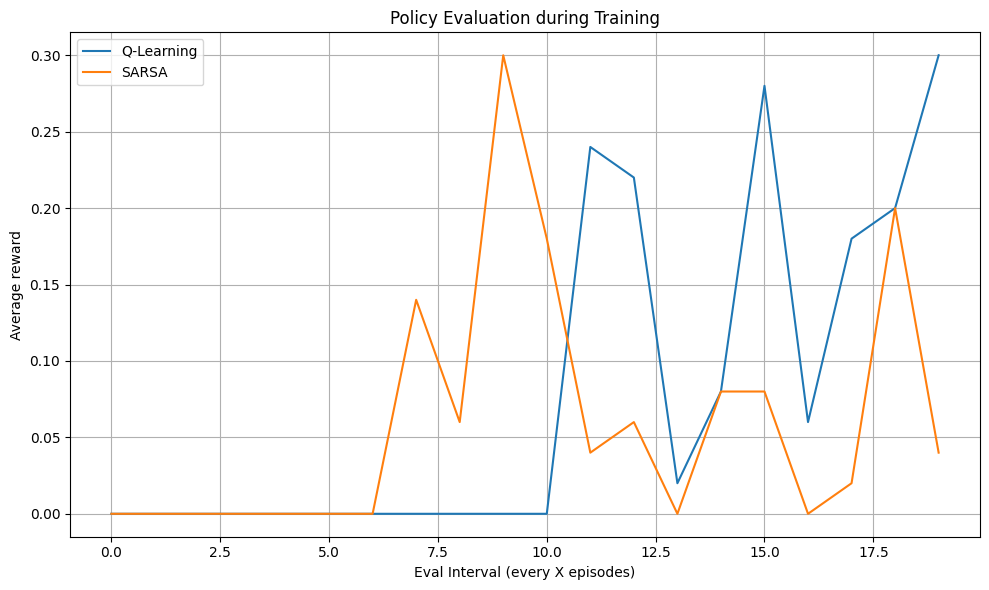

In [ ]:
env_frozen = gym.make("FrozenLake-v1", is_slippery=True)

Q_q, q_rewards, q_eval = q_learning(env_frozen, gamma=0.9, alpha=0.5, epsilon=0.5)
Q_s, sarsa_rewards, s_eval = sarsa(env_frozen, gamma=0.9, alpha=0.5, epsilon=0.5)

plot_rewards(q_eval, s_eval)

# **Vary the main parameters**

In [ ]:
def run_and_plot_param_variation(
    env,
    param_name,
    param_values,
    algorithm,
    fixed_params,
    episodes=1000,
    eval_interval=50,
    method_name="Q-Learning"
):
    eval_lists = []
    labels = []

    for val in param_values:
        params = fixed_params.copy()
        params[param_name] = val

        _, _, eval_rewards = algorithm(env, episodes=episodes, eval_interval=eval_interval, **params)

        eval_lists.append(eval_rewards)
        labels.append(f"{param_name}={val}")

    plt.figure(figsize=(10, 6))
    for rewards, label in zip(eval_lists, labels):
        plt.plot(rewards, label=label)

    fixed_info = ', '.join(f"{k}={v}" for k, v in fixed_params.items() if k != param_name)
    plt.title(f"{method_name}: variation of {param_name} ({fixed_info})")
    plt.xlabel("Eval Interval (every X episodes)")
    plt.ylabel("Average reward")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# **Alpha**

**Taxi**

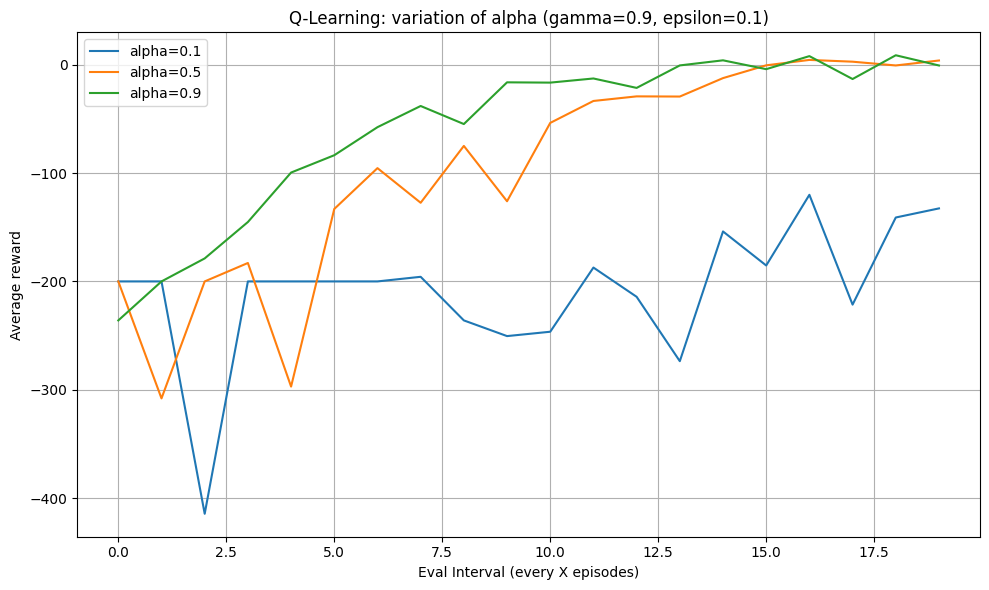

In [ ]:
env_taxi = gym.make("Taxi-v3")

run_and_plot_param_variation(
    env=env_taxi,
    param_name='alpha',
    param_values=[0.1, 0.5, 0.9],
    algorithm=q_learning,
    fixed_params={'gamma': 0.9, 'epsilon': 0.1},
    method_name="Q-Learning"
)

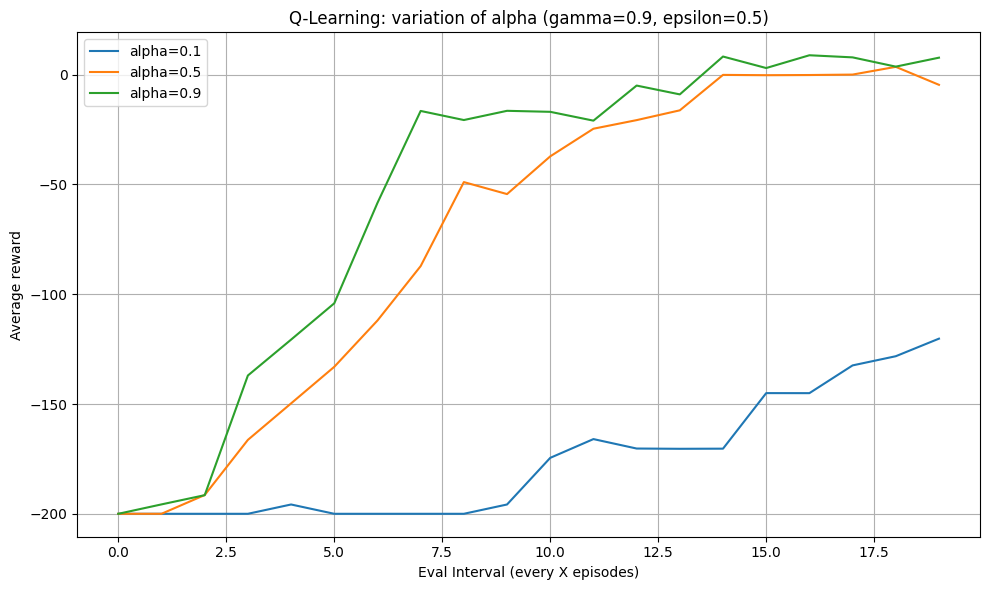

In [ ]:
env_taxi = gym.make("Taxi-v3")

run_and_plot_param_variation(
    env=env_taxi,
    param_name='alpha',
    param_values=[0.1, 0.5, 0.9],
    algorithm=q_learning,
    fixed_params={'gamma': 0.9, 'epsilon': 0.5},
    method_name="Q-Learning"
)

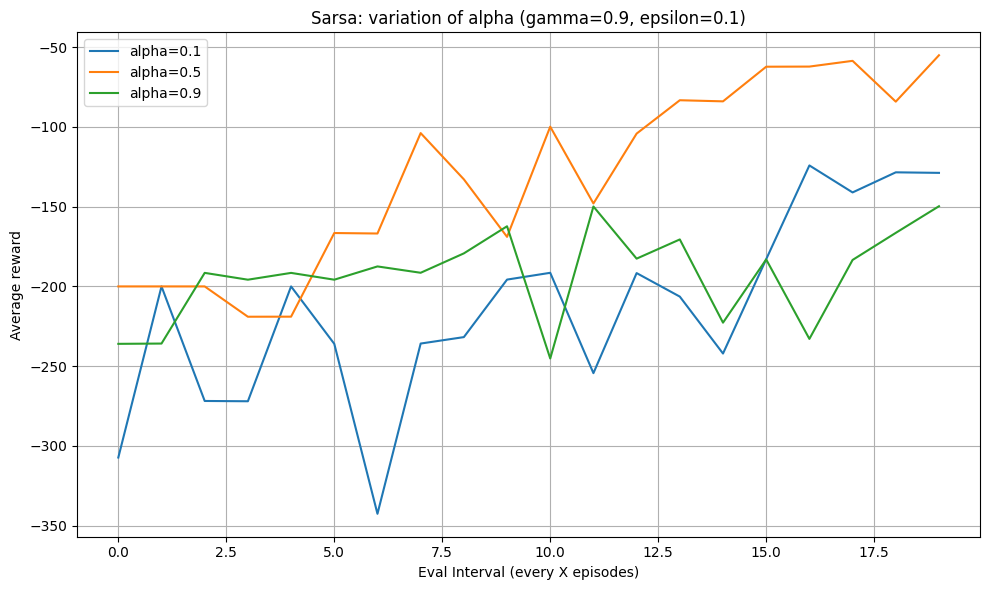

In [ ]:
env_taxi = gym.make("Taxi-v3")

run_and_plot_param_variation(
    env=env_taxi,
    param_name='alpha',
    param_values=[0.1, 0.5, 0.9],
    algorithm=sarsa,
    fixed_params={'gamma': 0.9, 'epsilon': 0.1},
    method_name="Sarsa"
)

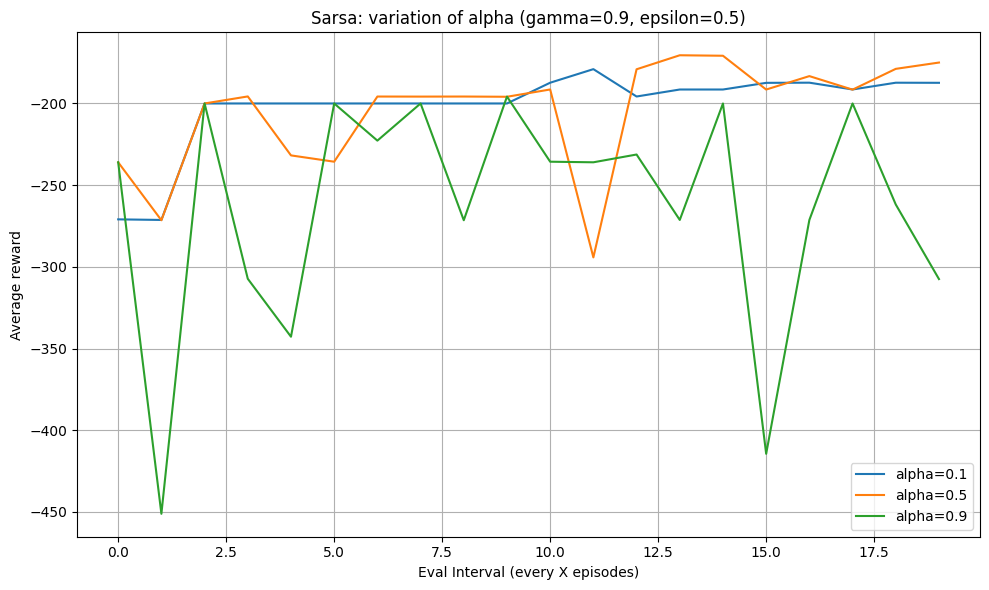

In [ ]:
env_taxi = gym.make("Taxi-v3")

run_and_plot_param_variation(
    env=env_taxi,
    param_name='alpha',
    param_values=[0.1, 0.5, 0.9],
    algorithm=sarsa,
    fixed_params={'gamma': 0.9, 'epsilon': 0.5},
    method_name="Sarsa"
)

Higher learning rates (α = 0.9) allow Q-Learning to adapt quickly by heavily weighting new experiences, which works well since it's off-policy and updates toward the optimal future action.

In contrast, SARSA, being on-policy, can become unstable with high α, especially when combined with high exploration (ε), as it updates based on potentially suboptimal exploratory actions.

**Frozen-Lake**

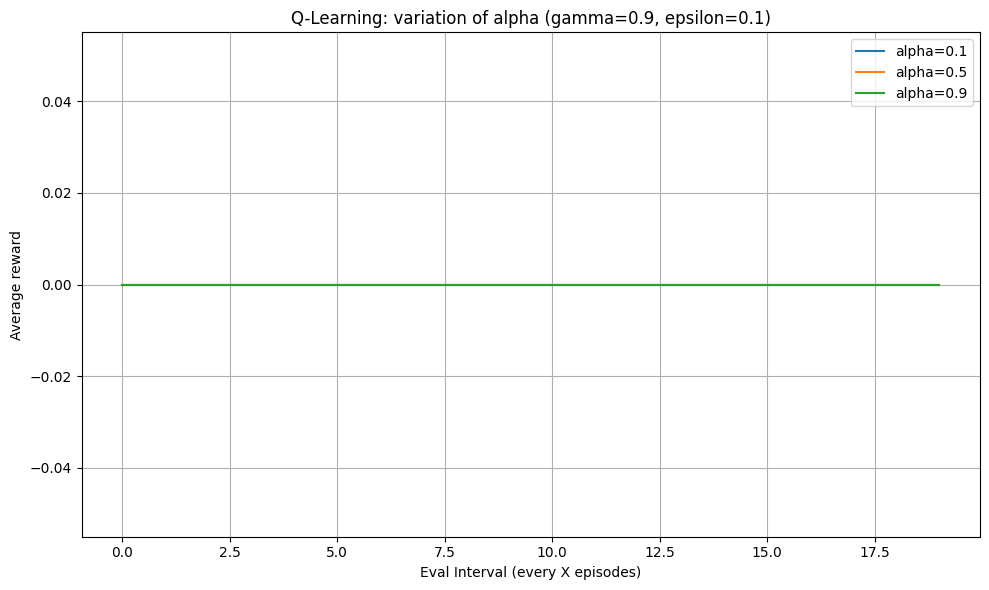

In [ ]:
env_frozen = gym.make("FrozenLake-v1", is_slippery=True)

run_and_plot_param_variation(
    env=env_frozen,
    param_name='alpha',
    param_values=[0.1, 0.5, 0.9],
    algorithm=q_learning,
    fixed_params={'gamma': 0.9, 'epsilon': 0.1},
    method_name="Q-Learning"
)

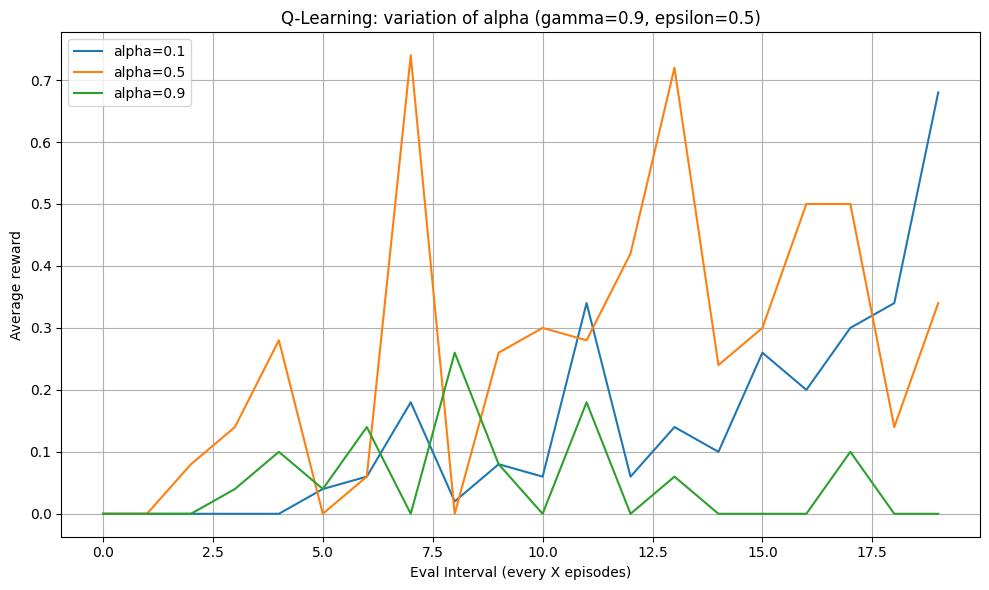

In [ ]:
env_frozen = gym.make("FrozenLake-v1", is_slippery=True)

run_and_plot_param_variation(
    env=env_frozen,
    param_name='alpha',
    param_values=[0.1, 0.5, 0.9],
    algorithm=q_learning,
    fixed_params={'gamma': 0.9, 'epsilon': 0.5},
    method_name="Q-Learning"
)

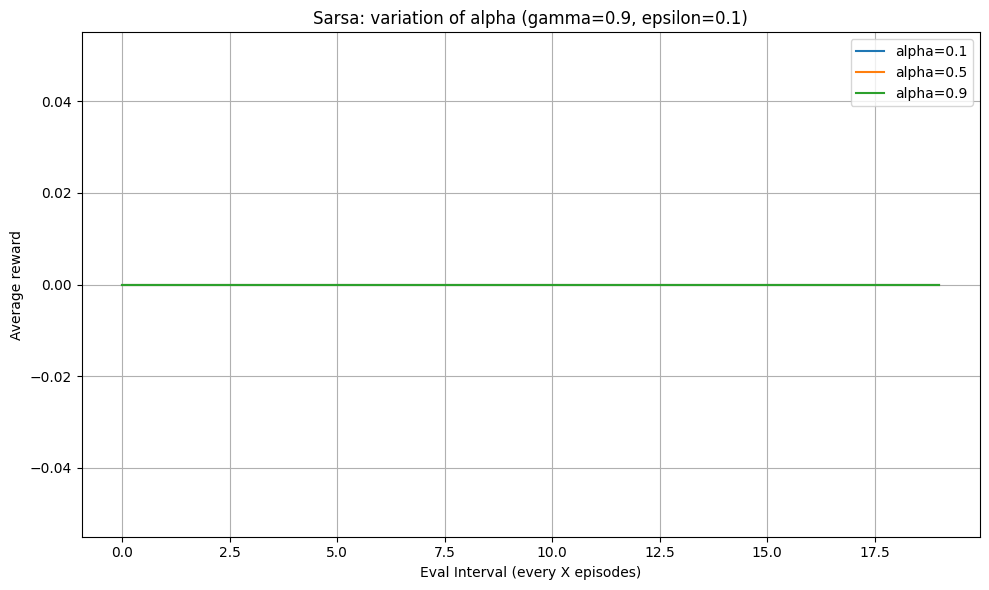

In [ ]:
env_frozen = gym.make("FrozenLake-v1", is_slippery=True)

run_and_plot_param_variation(
    env=env_frozen,
    param_name='alpha',
    param_values=[0.1, 0.5, 0.9],
    algorithm=sarsa,
    fixed_params={'gamma': 0.9, 'epsilon': 0.1},
    method_name="Sarsa"
)

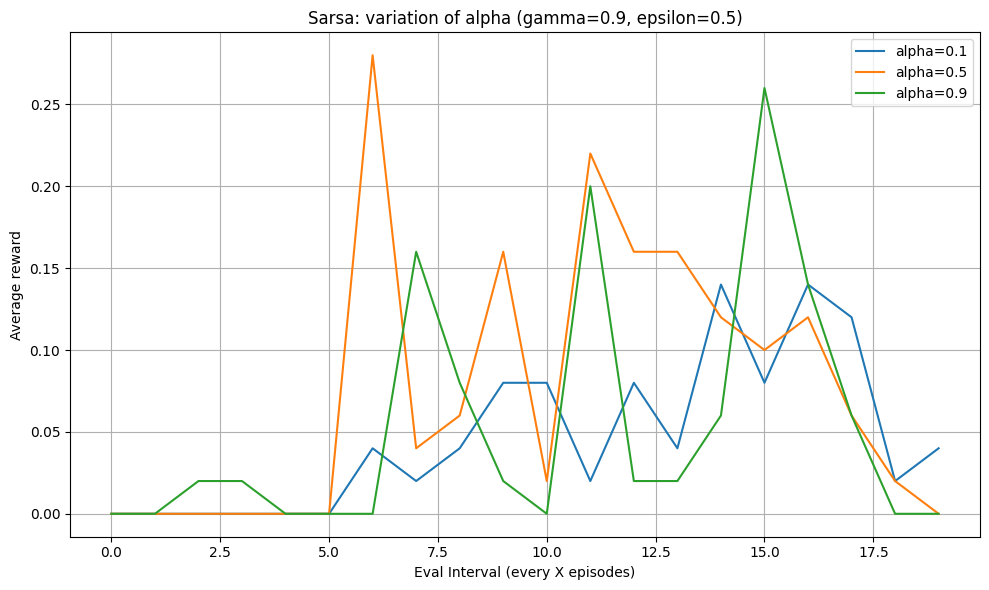

In [ ]:
env_frozen = gym.make("FrozenLake-v1", is_slippery=True)

run_and_plot_param_variation(
    env=env_frozen,
    param_name='alpha',
    param_values=[0.1, 0.5, 0.9],
    algorithm=sarsa,
    fixed_params={'gamma': 0.9, 'epsilon': 0.5},
    method_name="Sarsa"
)

In the stochastic FrozenLake environment, a moderate learning rate (α = 0.5) performs best with Q-Learning under sufficient exploration (ε = 0.5), while low exploration (ε = 0.1) leads to no learning regardless of α, and high α can cause instability due to noisy state transitions.

# **Gamma**

**Taxi**

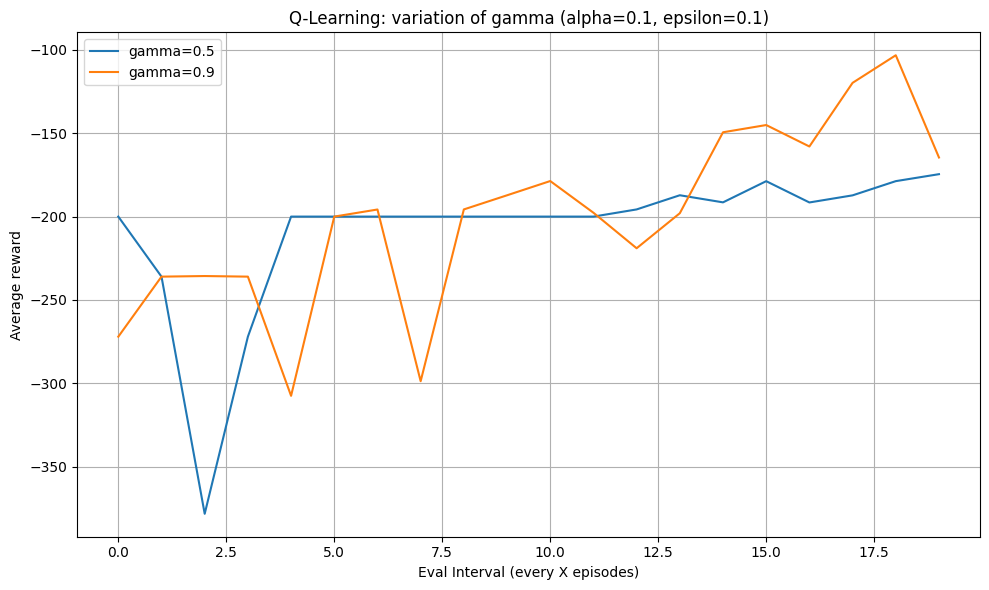

In [ ]:
env_taxi = gym.make("Taxi-v3")

run_and_plot_param_variation(
    env=env_taxi,
    param_name='gamma',
    param_values=[0.5, 0.9],
    algorithm=q_learning,
    fixed_params={'alpha': 0.1, 'epsilon': 0.1},
    method_name="Q-Learning"
)

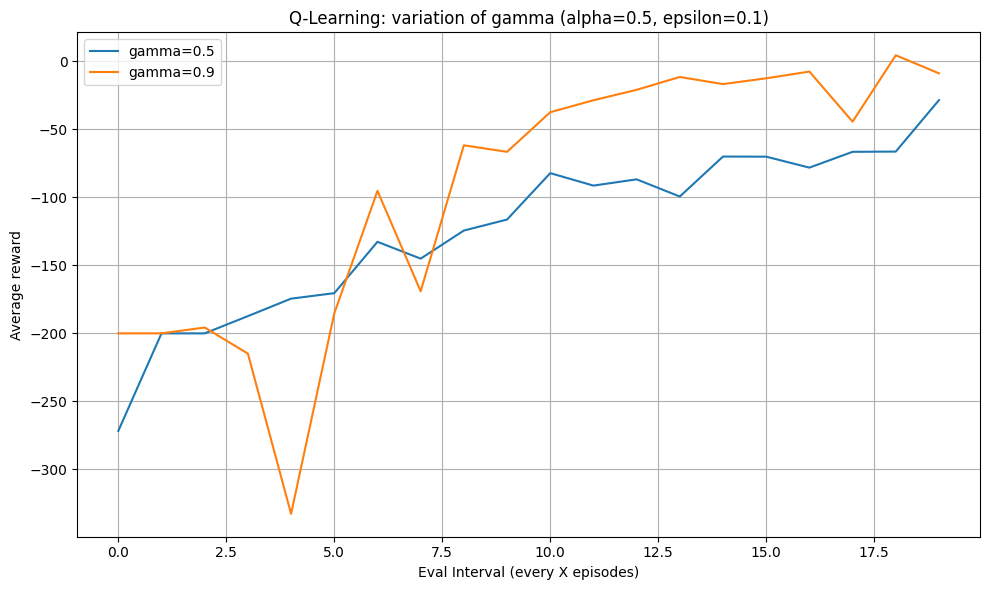

In [ ]:
env_taxi = gym.make("Taxi-v3")

run_and_plot_param_variation(
    env=env_taxi,
    param_name='gamma',
    param_values=[0.5, 0.9],
    algorithm=q_learning,
    fixed_params={'alpha': 0.5, 'epsilon': 0.1},
    method_name="Q-Learning"
)

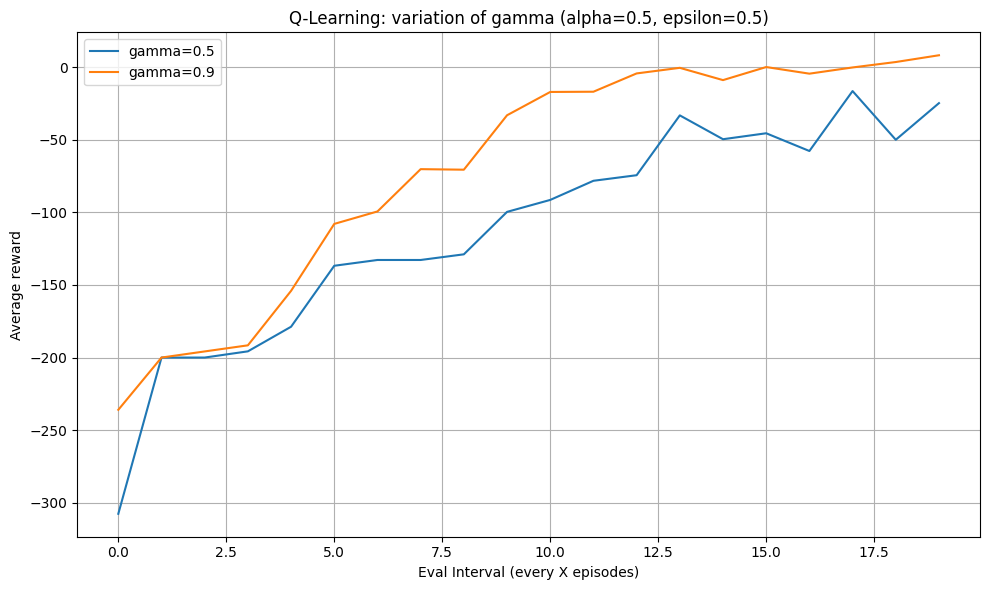

In [ ]:
env_taxi = gym.make("Taxi-v3")

run_and_plot_param_variation(
    env=env_taxi,
    param_name='gamma',
    param_values=[0.5, 0.9],
    algorithm=q_learning,
    fixed_params={'alpha': 0.5, 'epsilon': 0.5},
    method_name="Q-Learning"
)

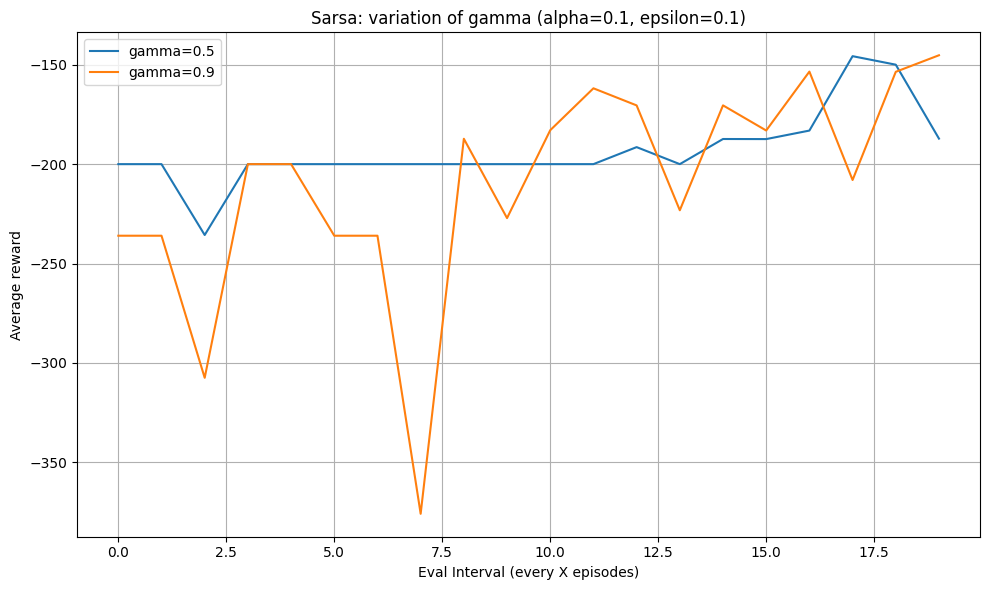

In [ ]:
env_taxi = gym.make("Taxi-v3")

run_and_plot_param_variation(
    env=env_taxi,
    param_name='gamma',
    param_values=[0.5, 0.9],
    algorithm=sarsa,
    fixed_params={'alpha': 0.1, 'epsilon': 0.1},
    method_name="Sarsa"
)

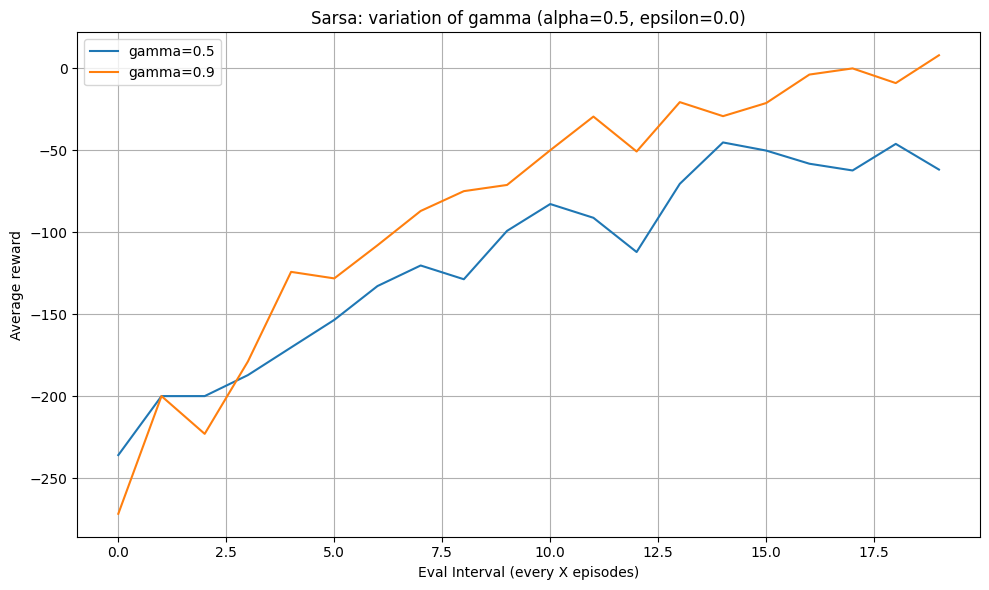

In [ ]:
env_taxi = gym.make("Taxi-v3")

run_and_plot_param_variation(
    env=env_taxi,
    param_name='gamma',
    param_values=[0.5, 0.9],
    algorithm=sarsa,
    fixed_params={'alpha': 0.5, 'epsilon': 0.},
    method_name="Sarsa"
)

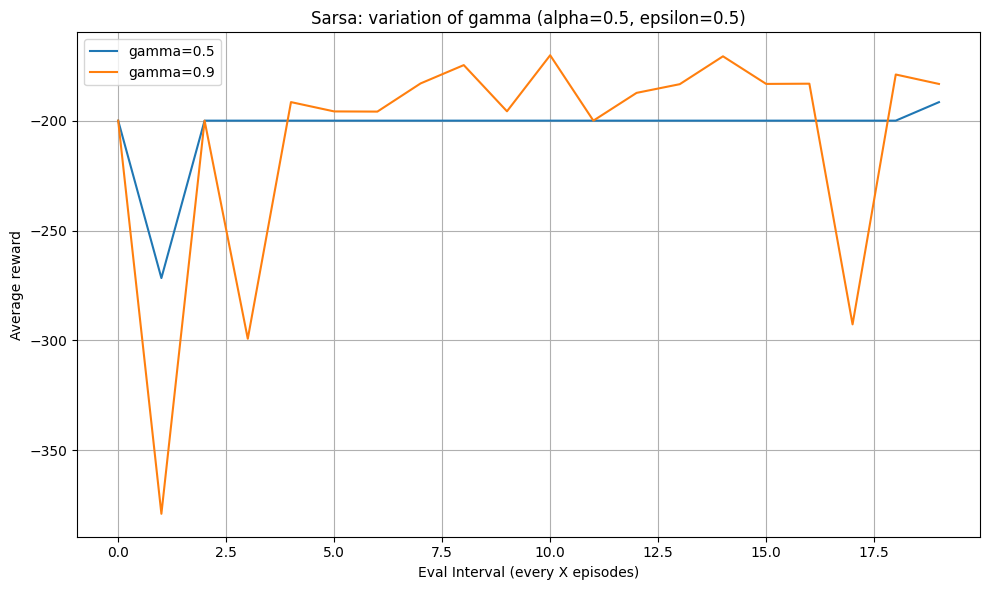

In [ ]:
env_taxi = gym.make("Taxi-v3")

run_and_plot_param_variation(
    env=env_taxi,
    param_name='gamma',
    param_values=[0.5, 0.9],
    algorithm=sarsa,
    fixed_params={'alpha': 0.5, 'epsilon': 0.5},
    method_name="Sarsa"
)

Higher discount factors (γ = 0.9) improve long-term planning and lead to better performance in both Q-Learning and SARSA, especially when combined with balanced learning and exploration, while lower γ (0.5) focuses too much on immediate rewards and slows down convergence.

**Frozen Lake**

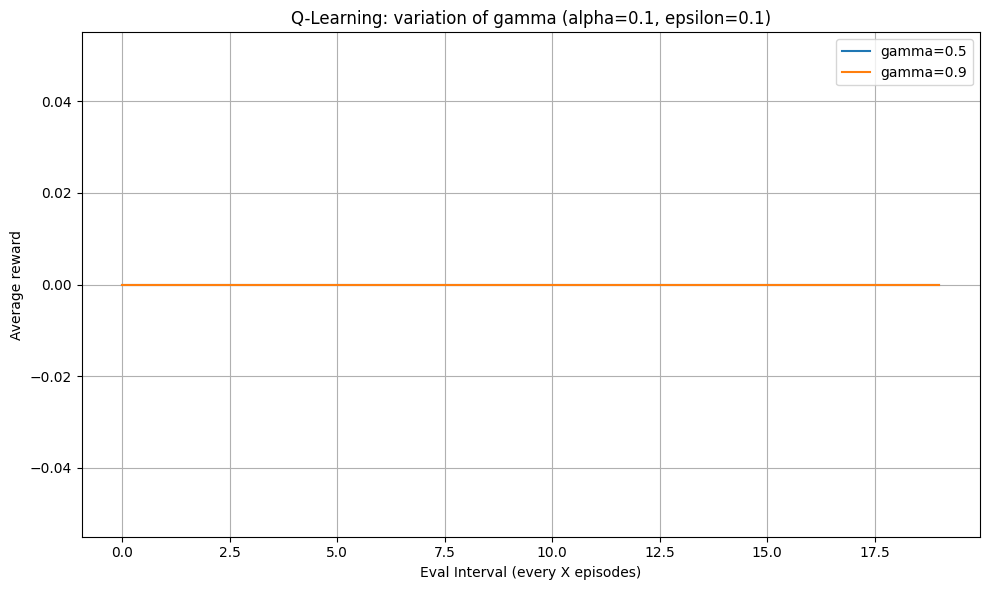

In [ ]:
env_frozen = gym.make("FrozenLake-v1", is_slippery=True)

run_and_plot_param_variation(
    env=env_frozen,
    param_name='gamma',
    param_values=[0.5, 0.9],
    algorithm=q_learning,
    fixed_params={'alpha': 0.1, 'epsilon': 0.1},
    method_name="Q-Learning"
)

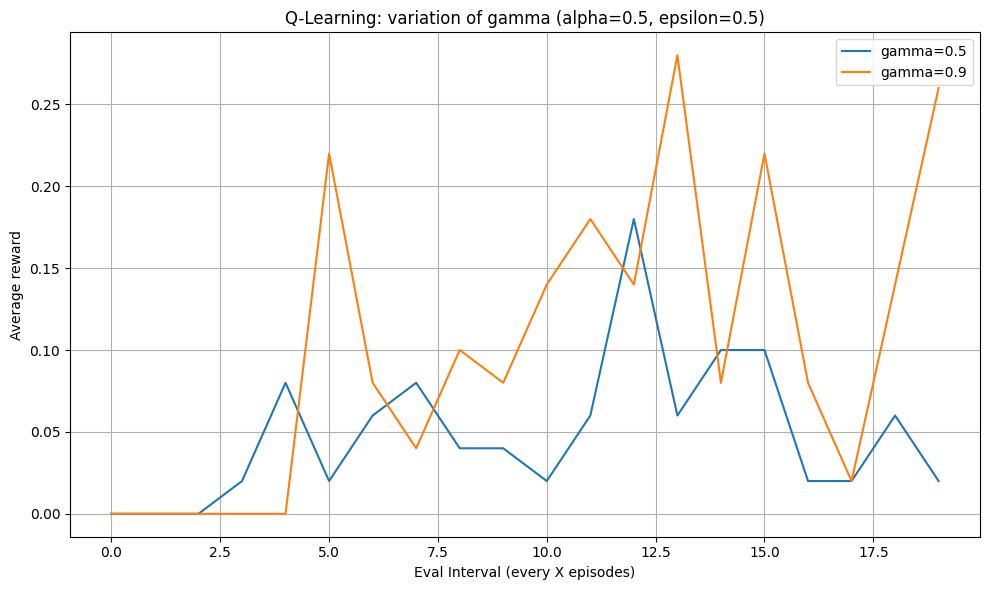

In [ ]:
env_frozen = gym.make("FrozenLake-v1", is_slippery=True)

run_and_plot_param_variation(
    env=env_frozen,
    param_name='gamma',
    param_values=[0.5, 0.9],
    algorithm=q_learning,
    fixed_params={'alpha': 0.5, 'epsilon': 0.5},
    method_name="Q-Learning"
)

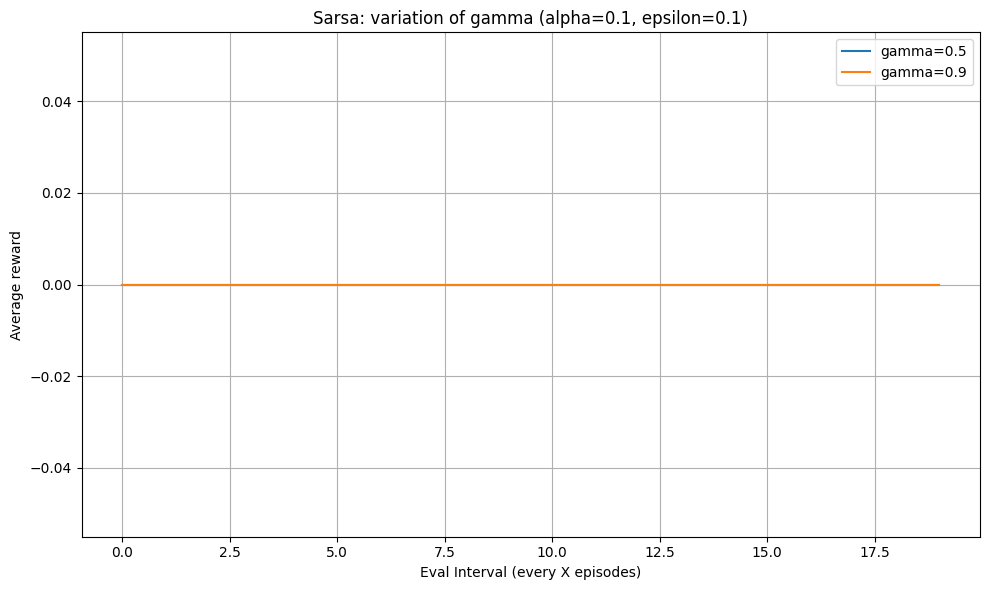

In [ ]:
env_frozen = gym.make("FrozenLake-v1", is_slippery=True)

run_and_plot_param_variation(
    env=env_frozen,
    param_name='gamma',
    param_values=[0.5, 0.9],
    algorithm=sarsa,
    fixed_params={'alpha': 0.1, 'epsilon': 0.1},
    method_name="Sarsa"
)

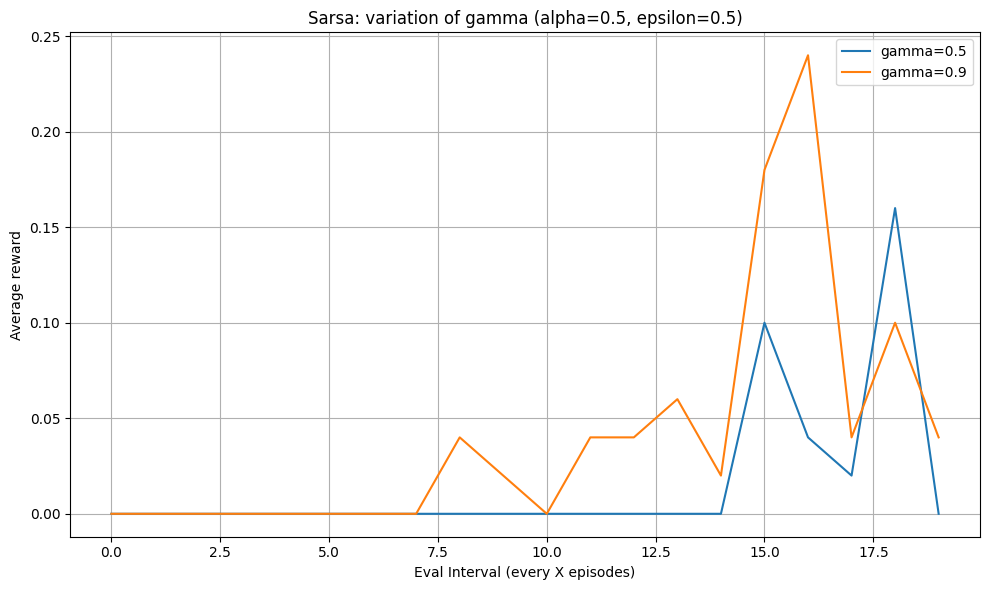

In [ ]:
env_frozen = gym.make("FrozenLake-v1", is_slippery=True)

run_and_plot_param_variation(
    env=env_frozen,
    param_name='gamma',
    param_values=[0.5, 0.9],
    algorithm=sarsa,
    fixed_params={'alpha': 0.5, 'epsilon': 0.5},
    method_name="Sarsa"
)

In the highly stochastic FrozenLake environment, a higher discount factor (γ = 0.9) shows slight advantages when exploration is sufficient, but has limited impact when exploration or learning rate is too low, as the agent struggles to consistently reach the goal regardless of future reward weighting.

# **Epsilon**

**Taxi**

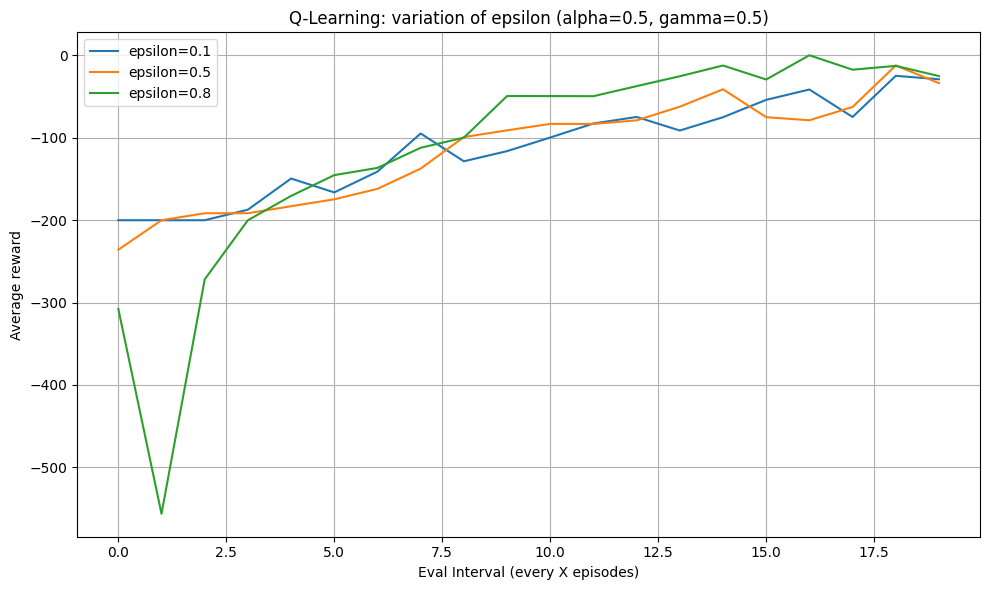

In [ ]:
env_taxi = gym.make("Taxi-v3")

run_and_plot_param_variation(
    env=env_taxi,
    param_name='epsilon',
    param_values=[0.1, 0.5, 0.8],
    algorithm=q_learning,
    fixed_params={'alpha': 0.5, 'gamma': 0.5},
    method_name="Q-Learning"
)

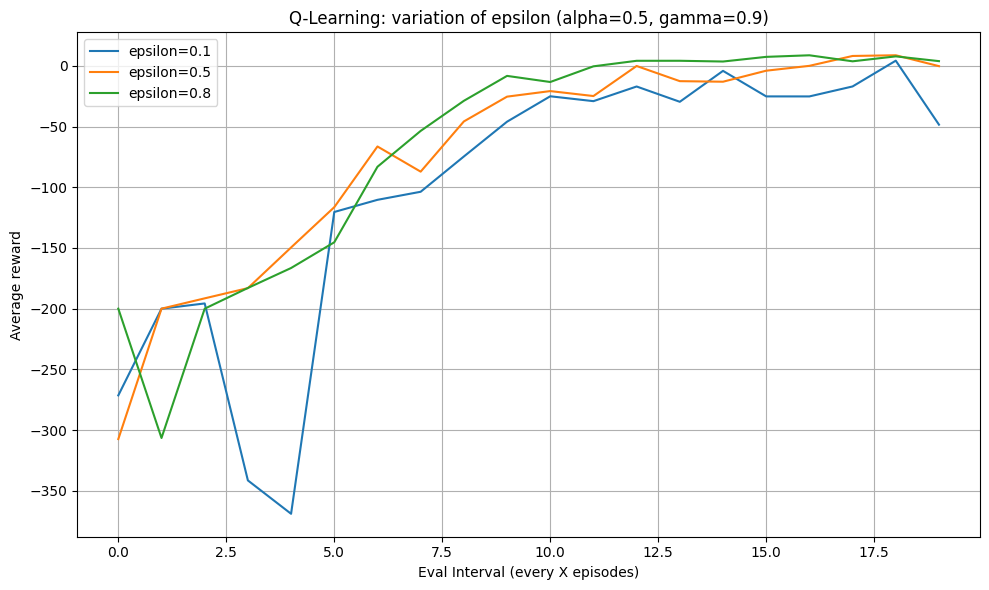

In [ ]:
env_taxi = gym.make("Taxi-v3")

run_and_plot_param_variation(
    env=env_taxi,
    param_name='epsilon',
    param_values=[0.1, 0.5, 0.8],
    algorithm=q_learning,
    fixed_params={'alpha': 0.5, 'gamma': 0.9},
    method_name="Q-Learning"
)

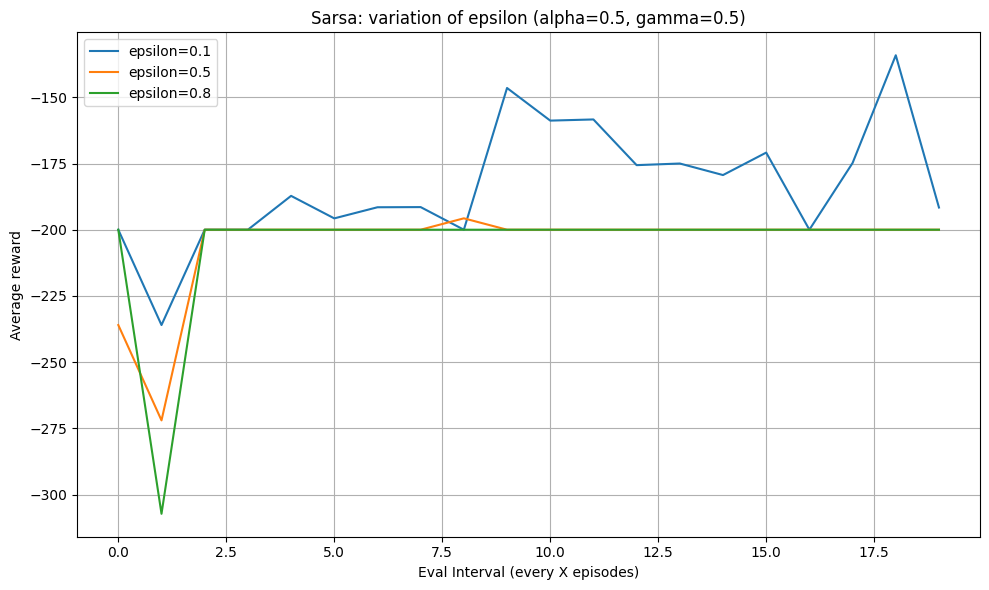

In [ ]:
env_taxi = gym.make("Taxi-v3")

run_and_plot_param_variation(
    env=env_taxi,
    param_name='epsilon',
    param_values=[0.1, 0.5, 0.8],
    algorithm=sarsa,
    fixed_params={'alpha': 0.5, 'gamma': 0.5},
    method_name="Sarsa"
)

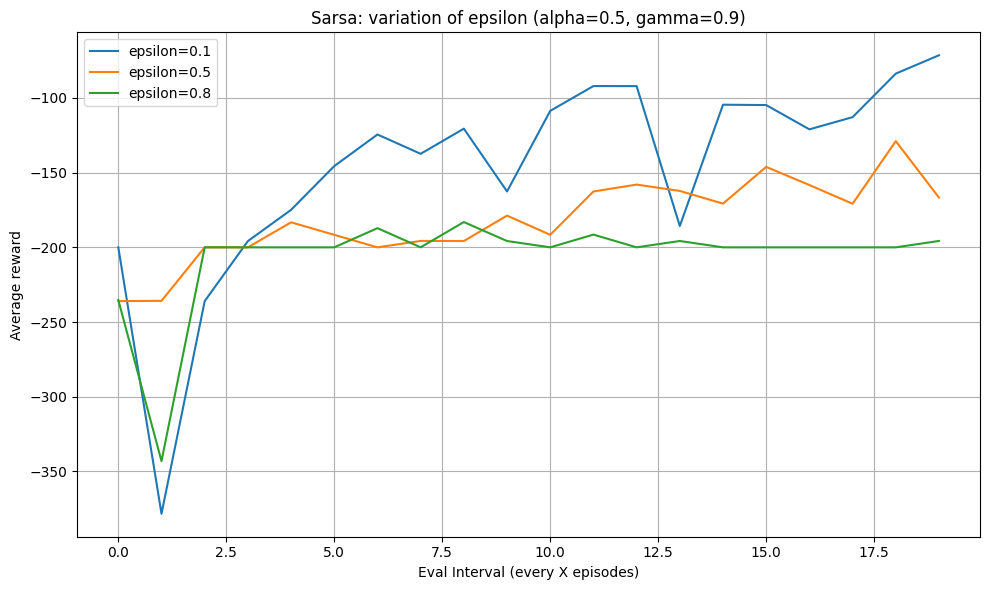

In [ ]:
env_taxi = gym.make("Taxi-v3")

run_and_plot_param_variation(
    env=env_taxi,
    param_name='epsilon',
    param_values=[0.1, 0.5, 0.8],
    algorithm=sarsa,
    fixed_params={'alpha': 0.5, 'gamma': 0.9},
    method_name="Sarsa"
)

Moderate exploration (ε = 0.5) generally balances learning and performance well in both Q-Learning and SARSA, while too little exploration (ε = 0.1) slows learning, and too much (ε = 0.8) can hurt convergence by overly relying on random actions.

**Frozen Lake**

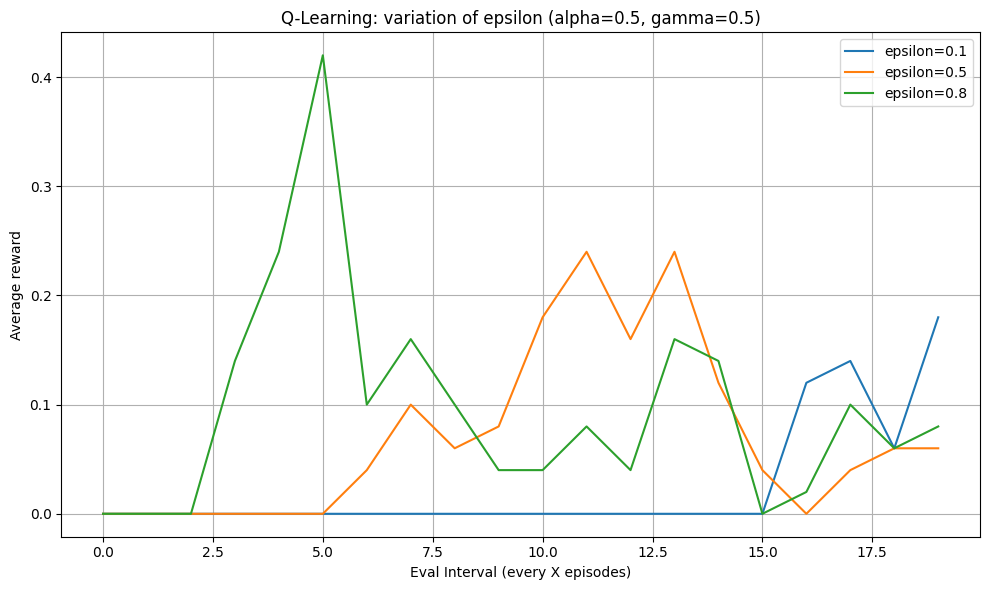

In [ ]:
env_frozen = gym.make("FrozenLake-v1", is_slippery=True)

run_and_plot_param_variation(
    env=env_frozen,
    param_name='epsilon',
    param_values=[0.1, 0.5, 0.8],
    algorithm=q_learning,
    fixed_params={'alpha': 0.5, 'gamma': 0.5},
    method_name="Q-Learning"
)

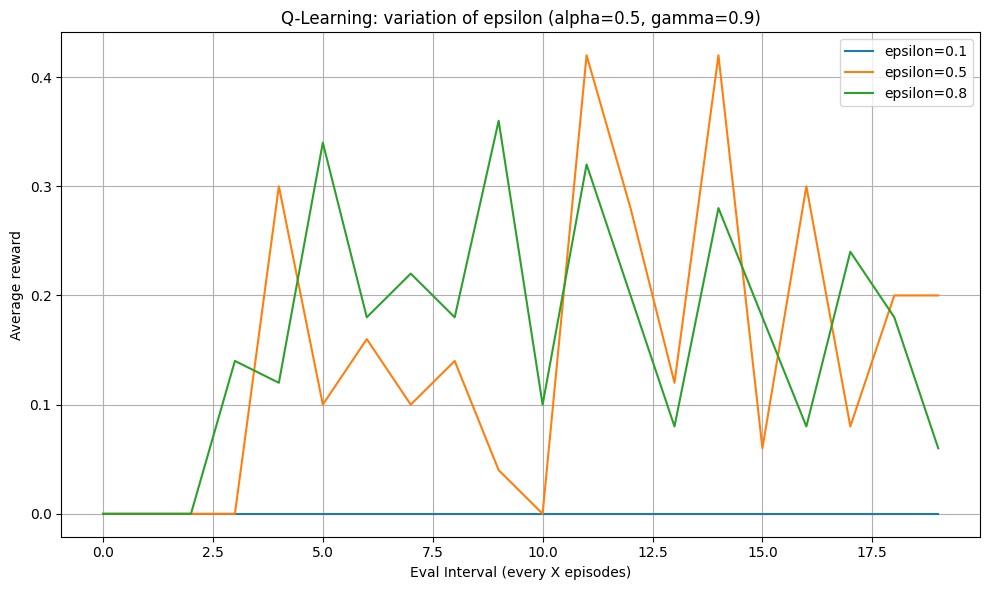

In [ ]:
env_frozen = gym.make("FrozenLake-v1", is_slippery=True)

run_and_plot_param_variation(
    env=env_frozen,
    param_name='epsilon',
    param_values=[0.1, 0.5, 0.8],
    algorithm=q_learning,
    fixed_params={'alpha': 0.5, 'gamma': 0.9},
    method_name="Q-Learning"
)

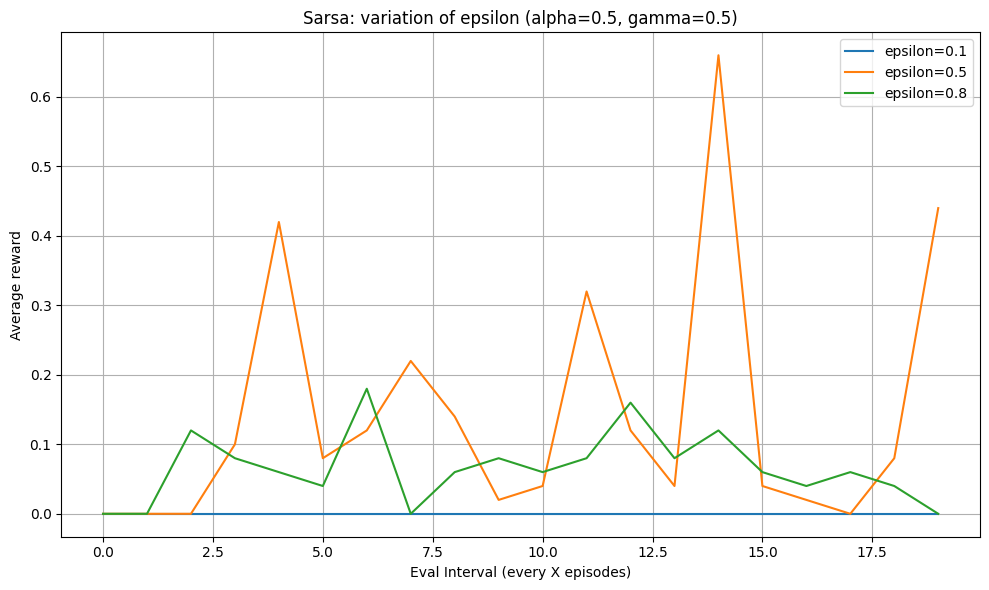

In [ ]:
env_frozen = gym.make("FrozenLake-v1", is_slippery=True)

run_and_plot_param_variation(
    env=env_frozen,
    param_name='epsilon',
    param_values=[0.1, 0.5, 0.8],
    algorithm=sarsa,
    fixed_params={'alpha': 0.5, 'gamma': 0.5},
    method_name="Sarsa"
)

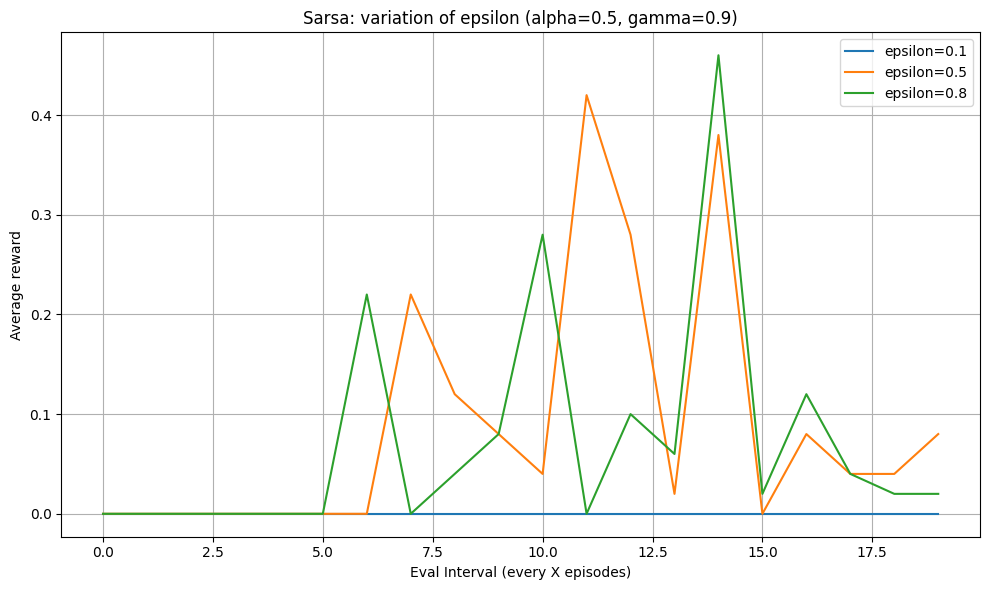

In [ ]:
env_frozen = gym.make("FrozenLake-v1", is_slippery=True)

run_and_plot_param_variation(
    env=env_frozen,
    param_name='epsilon',
    param_values=[0.1, 0.5, 0.8],
    algorithm=sarsa,
    fixed_params={'alpha': 0.5, 'gamma': 0.9},
    method_name="Sarsa"
)

In the stochastic FrozenLake environment, higher exploration (ε = 0.5 or 0.8) is crucial for discovering successful paths, while low exploration (ε = 0.1) prevents learning entirely, making moderate-to-high epsilon values essential for both Q-Learning and SARSA.

Q-Learning learns faster and performs better than SARSA, especially in deterministic environments like Taxi-v3, while SARSA is more stable but less effective in stochastic ones like FrozenLake; overall, balanced hyperparameters (moderate α, high γ, and sufficient ε) are key to good performance across both algorithms.